## Regan Alt - 07/06/21 - Assignment 6
## Stock Price Statistics

### A) Data Preparation

In [2]:
# read a .csv into a DataFrame; the first column of the data are dates
import pandas as pd
luludf = pd.read_csv("LULU.csv", index_col=0, parse_dates=True)

In [3]:
# look at data
luludf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-01,73.879997,74.809998,73.750000,73.959999,73.959999,1566000
2016-07-05,73.489998,74.220001,72.889999,73.279999,73.279999,963000
2016-07-06,73.370003,74.559998,73.059998,74.410004,74.410004,1264300
2016-07-07,74.500000,75.250000,74.139999,75.199997,75.199997,1438200
2016-07-08,75.500000,77.019997,75.239998,76.720001,76.720001,1754200


In [4]:
# read S&P500 data from csv
spydf = pd.read_csv("SPY.csv", index_col=0, parse_dates=True)

In [5]:
# look at data
spydf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-01,209.479996,210.490005,209.289993,209.919998,191.944946,106055300
2016-07-05,208.949997,209.080002,207.710007,208.410004,190.564194,109803700
2016-07-06,207.830002,209.800003,207.059998,209.660004,191.707199,96021500
2016-07-07,209.869995,210.649994,208.630005,209.529999,191.588303,85593800
2016-07-08,211.050003,212.940002,210.779999,212.649994,194.441162,133971000


### B) Price Time Series – Stock

#### B.1) Create a line chart for the adjusted closing prices of your stock.

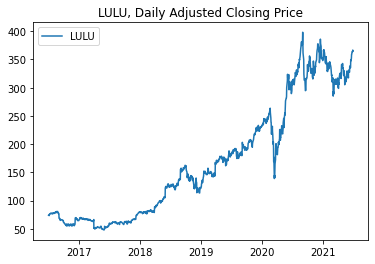

In [6]:
# plot time series of LULU Stock
#import plotting packages
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# label the chart
plt.title("LULU, Daily Adjusted Closing Price")
plt.plot(luludf.index, luludf["Adj Close"], label='LULU')
plt.legend(loc='upper left')
plt.show()

### C) Price Time Series – Compare

#### C.1) Create a single chart with both time series for the adjusted closing prices of LULU's stock and the closing prices of the S&P500 (using left and right Y axes).

In [7]:
# For the subset dataframe, rename the column to be the LULU ticker
luludrop = luludf.rename(columns=({"Adj Close": "LULU"}))
#drop rest of columns 
luludrop = luludrop.drop(['Open', 'High', 'Low', 'Close', 'Volume'],axis=1)
luludrop.head(5)

,LULU
Date,
2016-07-01,73.959999
2016-07-05,73.279999
2016-07-06,74.410004
2016-07-07,75.199997
2016-07-08,76.720001


In [8]:
# For the subset dataframe, rename the column to be the S&P500 ticker
spydrop = spydf.rename(columns=({"Adj Close": "SPY"}))
#drop rest of columns 
spydrop = spydrop.drop(['Open', 'High', 'Low', 'Close', 'Volume'],axis=1)
spydrop.head(5)

,SPY
Date,
2016-07-01,191.944946
2016-07-05,190.564194
2016-07-06,191.707199
2016-07-07,191.588303
2016-07-08,194.441162


In [9]:
# Combine the steps above into a function that will read a csv
# and return a 1-column Dataframe
def readAdjClose(ticker):
    df = pd.read_csv(ticker+".csv", parse_dates=True, index_col="Date")
    dfresult = df[["Adj Close"]].copy()
    dfresult.rename(columns=({"Adj Close": ticker}), inplace=True)
    return dfresult

In [10]:
# test the above function for the LULU ticker
lulu = readAdjClose("LULU")
lulu.head(5)

,LULU
Date,
2016-07-01,73.959999
2016-07-05,73.279999
2016-07-06,74.410004
2016-07-07,75.199997
2016-07-08,76.720001


In [11]:
# join the two DataFrames
spy = readAdjClose("SPY")
stockdf = lulu.join(spy, how='outer')
stockdf.head(5)

,LULU,SPY
Date,,
2016-07-01,73.959999,191.944946
2016-07-05,73.279999,190.564194
2016-07-06,74.410004,191.707199
2016-07-07,75.199997,191.588303
2016-07-08,76.720001,194.441162


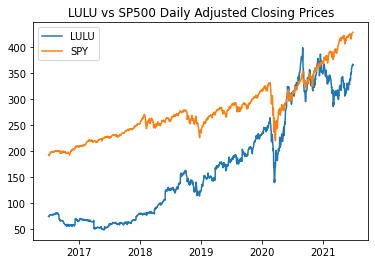

In [12]:
# plot time series of LULU and SP500 Stocks
%matplotlib inline
import matplotlib.pyplot as plt
# related to datetime conversion (from matplotlib warning message)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.title("LULU vs SP500 Daily Adjusted Closing Prices")
lululine = plt.plot(lulu.index, lulu["LULU"], label='LULU')
spyline = plt.plot(spydrop.index, spydrop["SPY"], label='SPY')
plt.legend(loc='upper left')
plt.show()
# need to make 2 y axes 

#### C.2) Over the period of the chart, did your stock outperform or underperform the S&P500?

During the lockdown during the pandemic in 2020, it appears Lululemon's stock briefly outperformed the S&P500, but it has  been underperforming since 2021. 

 ## D) Analysis - Stock Beta

### D.1) Create a Scatter Plot for the daily returns of your stock vs. the daily returns of the S&P500. See Appendix B for the definition of daily return. The S&P500 returns should be the X axis. The Scatter Plot should include daily returns from 2019 and 2020 (filter out data from before 2019 and from 2021).

In [13]:
# filter in rows between  2019 - 2020 (years with complete data for LULU & SP500)
# the filter uses the .loc method with a slice of start/end dates
stockdfyears = stockdf.loc['2019-01-01':'2021-06-30']
stockdfyears.head(5)

,LULU,SPY
Date,,
2019-01-02,123.349998,240.242630
2019-01-03,124.360001,234.509766
2019-01-04,128.550003,242.364868
2019-01-07,134.100006,244.275818
2019-01-08,135.860001,246.570862


In [14]:
# create a DataFrame of daily return, using the pct_change() method
stockreturns = stockdfyears.pct_change()
stockreturns.head(5)

,LULU,SPY
Date,,
2019-01-02,NaN,NaN
2019-01-03,0.008188,-0.023863
2019-01-04,0.033693,0.033496
2019-01-07,0.043174,0.007885
2019-01-08,0.013124,0.009395


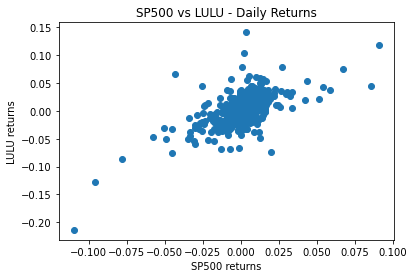

In [15]:
# Scatterplot for daily returns for LULU and S&P500
x = stockdfyears["SPY"]
xret = x.pct_change()[1:]

y = stockdfyears["LULU"]
yret = y.pct_change()[1:]

plt.title("SP500 vs LULU - Daily Returns")
plt.scatter(xret, yret)
plt.xlabel('SP500 returns')
plt.ylabel('LULU returns')
plt.show()

### D.2) For the daily returns in part D.1 (2019-2020), perform a linear regression between the S&P500 daily returns (independent variable) and your stock’s daily returns (dependent variable). What is the equation of the regression line, and the R-squared? What is the slope of the line (this is the beta of the stock against the S&P500)?

In [16]:
# regression of LULU returns vs. SP500
import statsmodels.api as sm
indvars = sm.add_constant(xret) # allow for non-zero intercept
model = sm.OLS(yret, indvars).fit() #OLS= ordinary least-squares regression
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   LULU   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     388.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.32e-67
Time:                        11:37:58   Log-Likelihood:                 1569.6
No. Observations:                 628   AIC:                            -3135.
Df Residuals:                     626   BIC:                            -3126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.205      0.2

In [17]:
# alternative for regression: scipy
from scipy.stats import linregress
beta, alpha, r, p, stderr = linregress(xret, yret)
print("Beta=     ", round(beta, 2))
print("Alpha=    ", round(alpha,4))
print("R-squared=", round(r**2*100,1), '%')
print("P-stat=   ", round(p,6))

Beta=      1.06
Alpha=     0.001
R-squared= 38.3 %
P-stat=    0.0


#### The equation for the regression line is: Y = a +bX  or LULU = 0.001 + 1.06(SP500)  
#### The R-squared is .383 or 38.3%, meaning the stock does not generally move in line with the index.
#### The slope of the line is 1.06 (beta)

## E) Analysis – Outliers

### E.1) For your company, identify the dates of the largest (most positive) and smallest (most negative) daily price returns. For these two dates, report the date, the date’s adjusted price, and the daily return. (Not required: was there a company-specific event that occurred on that date?)

In [18]:
lulureturns = luludrop.pct_change()
lulureturns.tail(5)

,LULU
Date,
2021-06-24,0.006984
2021-06-25,0.004918
2021-06-28,0.000275
2021-06-29,0.007889
2021-06-30,-0.004609


In [19]:
# combine two dataframes for the daily returns and adjusted closing price
lulustockreturns = pd.merge(lulureturns,lulu, how = 'left', on = 'Date')
lulustockreturns.head()

,LULU_x,LULU_y
Date,,
2016-07-01,NaN,73.959999
2016-07-05,-0.009194,73.279999
2016-07-06,0.015420,74.410004
2016-07-07,0.010617,75.199997
2016-07-08,0.020213,76.720001


In [20]:
# what are the dates of LULU's highest daily returns?
lulustockreturns.sort_values(["LULU_x", "LULU_y"], ascending=False, inplace=True)
lulustockreturns.head(10)

,LULU_x,LULU_y
Date,,
2018-06-01,0.163160,122.190002
2016-12-08,0.150401,68.839996
2019-03-28,0.141281,167.539993
2018-08-31,0.130876,154.929993
2020-03-24,0.118630,192.740005
2017-06-02,0.115472,54.290001
2020-03-19,0.103306,154.860001
2018-03-28,0.092110,85.959999
2018-12-26,0.082995,122.660004


#### The date of LULU's highest daily return was on June 1st, 2018. The daily return was 0.163 and the adjusted closing price of the stock was 122.19 dollars. It appears this was their highest date following a strong 2 quarters of revenue growth.

In [21]:
# what are the dates of LULU's lowest daily returns?
lulustockreturns.sort_values(["LULU_x", "LULU_y"], ascending=True, inplace=True)
lulustockreturns.head(10)

,LULU_x,LULU_y
Date,,
2017-03-30,-0.234389,50.759998
2020-03-16,-0.213692,138.979996
2018-12-07,-0.133673,113.870003
2020-03-12,-0.127026,169.130005
2016-09-02,-0.105531,68.570000
2020-03-09,-0.085930,199.770004
2020-02-27,-0.074866,220.699997
2020-09-09,-0.073957,323.929993
2019-05-29,-0.068914,161.589996


#### The date of LULU's lowest daily return was on March 30th, 2017. The daily return was -0.234 and the adjusted closing price that day  was about 50.76 dollars. After the first quarter of 2017, LULU's stock "crashed" due to weak sales performance from lack of depth and colors for the spring season, alongside negative financial outlook from investors.

## F) Analysis – Price Move Distribution

### For this section, use one year of data (from 2020).
### F.1) Create a Histogram chart showing the distribution of daily price returns for XYZ.

In [22]:
# calculate daily returns
lu = stockdfyears["LULU"].loc['2020-01-01':'2020-12-31']
luluhist = lu.pct_change()[1:]
type(luluhist)
luluhist.head()

Date
2020-01-03   -0.003342
2020-01-06    0.011993
2020-01-07   -0.007348
2020-01-08    0.015276
2020-01-09   -0.005774
Name: LULU, dtype: float64

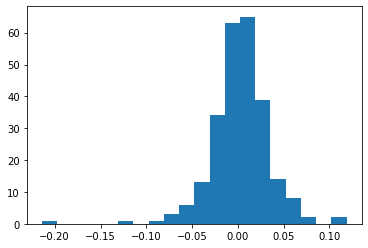

In [23]:
# histogram of daily returns, granularity of 20 bins
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(luluhist, 20)
plt.show()

### F.2) Report the mean and standard deviation of the daily price returns for Lululemon

In [24]:
# statistical mean and standard deviation for LULU's daily returns
print("mean=", round(luluhist.mean(),5))
print("std dev=", round(luluhist.std(),5))

mean= 0.00212
std dev= 0.03221


### F.3) Determine whether the daily returns for LULU follow a normal distribution (appendix C).

In [25]:
# checking for normality
print("skewness=", round(luluhist.skew(),1))
print("kurtosis=", round(luluhist.kurt(),1))

skewness= -1.2
kurtosis= 9.1


####  Lululemon's returns are not normally distributed as the skewness is -1.2, outside the normal distribution of (-.3, .3).  The data is thus not symmetrical either.

#### The distribution tails of Lululemon's returns are also not as expected with a kurtosis of 9.1, way outside the 3 range. Thus it appears the LULU stock has  heavier tails than a normal distribution.  